## Bribe and Voting report for bveCVX overview

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display_functions import display
from IPython.display import HTML

from decimal import Decimal
from typing import Dict
from typing import List
from notebooks.cvx_bribes.bvecvx_data import VOTING_DATASETS


%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 20, 10

TABLE_COLUMNS = ["Voting Round", "Total bveCVX bought in $", "Total BADGER bought in $", "bveCVX bought", "BADGER bought",
                 "$/vlcvx total", "$/vlcvx pure bribes", "$/vlcvx Llama", "vlcvx difference %"]

data_rows = []
for voting_round in VOTING_DATASETS:
    llama_vlcvx = voting_round['llama_vlcvx']
    badger_vlcvx = voting_round['$/vlCVX without badgerwbtc']
    difference_with_llama = round(
        abs(badger_vlcvx - llama_vlcvx) / ((llama_vlcvx + badger_vlcvx) / 2) * 100, 3
    )
    data_rows.append([
        voting_round['round'], voting_round['total_cvx_sold_in_$'], voting_round['total_badger_sold_in_$'],
        voting_round['amount_cvx'], voting_round['amount_badger'], voting_round['$/vlCVX for total votes'],
        voting_round['$/vlCVX without badgerwbtc'], voting_round['llama_vlcvx'], difference_with_llama
    ])
data_rows.reverse()
dataframe = pd.DataFrame(data=data_rows, columns=TABLE_COLUMNS)
display(HTML(dataframe.to_html(index=False)))

Voting Round,Total bveCVX bought in $,Total BADGER bought in $,bveCVX bought,BADGER bought,$/vlcvx total,$/vlcvx pure bribes,$/vlcvx Llama,vlcvx difference %
8th Aug 2023,17364.25,6572.99,5339.56,2998.63,0.027,0.0302,0.03026,0.198
25th Jul 2023,23369.26,8829.62,6779.59,4232.80,0.0346,0.0387,0.03746,3.256
11th Jul 2023,41555.35,15691.78,10319.18,7380.89,0.0367,0.0399,0.03659,8.655
22nd Jun 2023,52709.14,19844.61,14999.76,9016.18,0.034,0.037,0.03696,0.108
8th Jun 2023,53806.69,20276.55,15755.98,10072.8,0.034,0.0363,0.035,3.647
25th May 2023,60632.46,23001.17,13833.55,9263.46,0.04,0.041,0.0434,5.687
11th May 2023,63975.6,24296.24,13603.14,9546.66,0.042,0.046,0.04321,6.255
27th Apr 2023,59040.3,22551.23,11592.44,8097.4,0.043,0.0472,0.04482,5.173
13th Apr 2023,76387.9,29379.8,12418.8,9350.7,0.057,0.0622,0.05899,5.297
30th Mar 2023,56042.71,21073.87,10590.1,7613.4,0.0494,0.0534,0.04874,9.125


## Overall $/vlCVX data
Display performance of bveCVX over different voting rounds

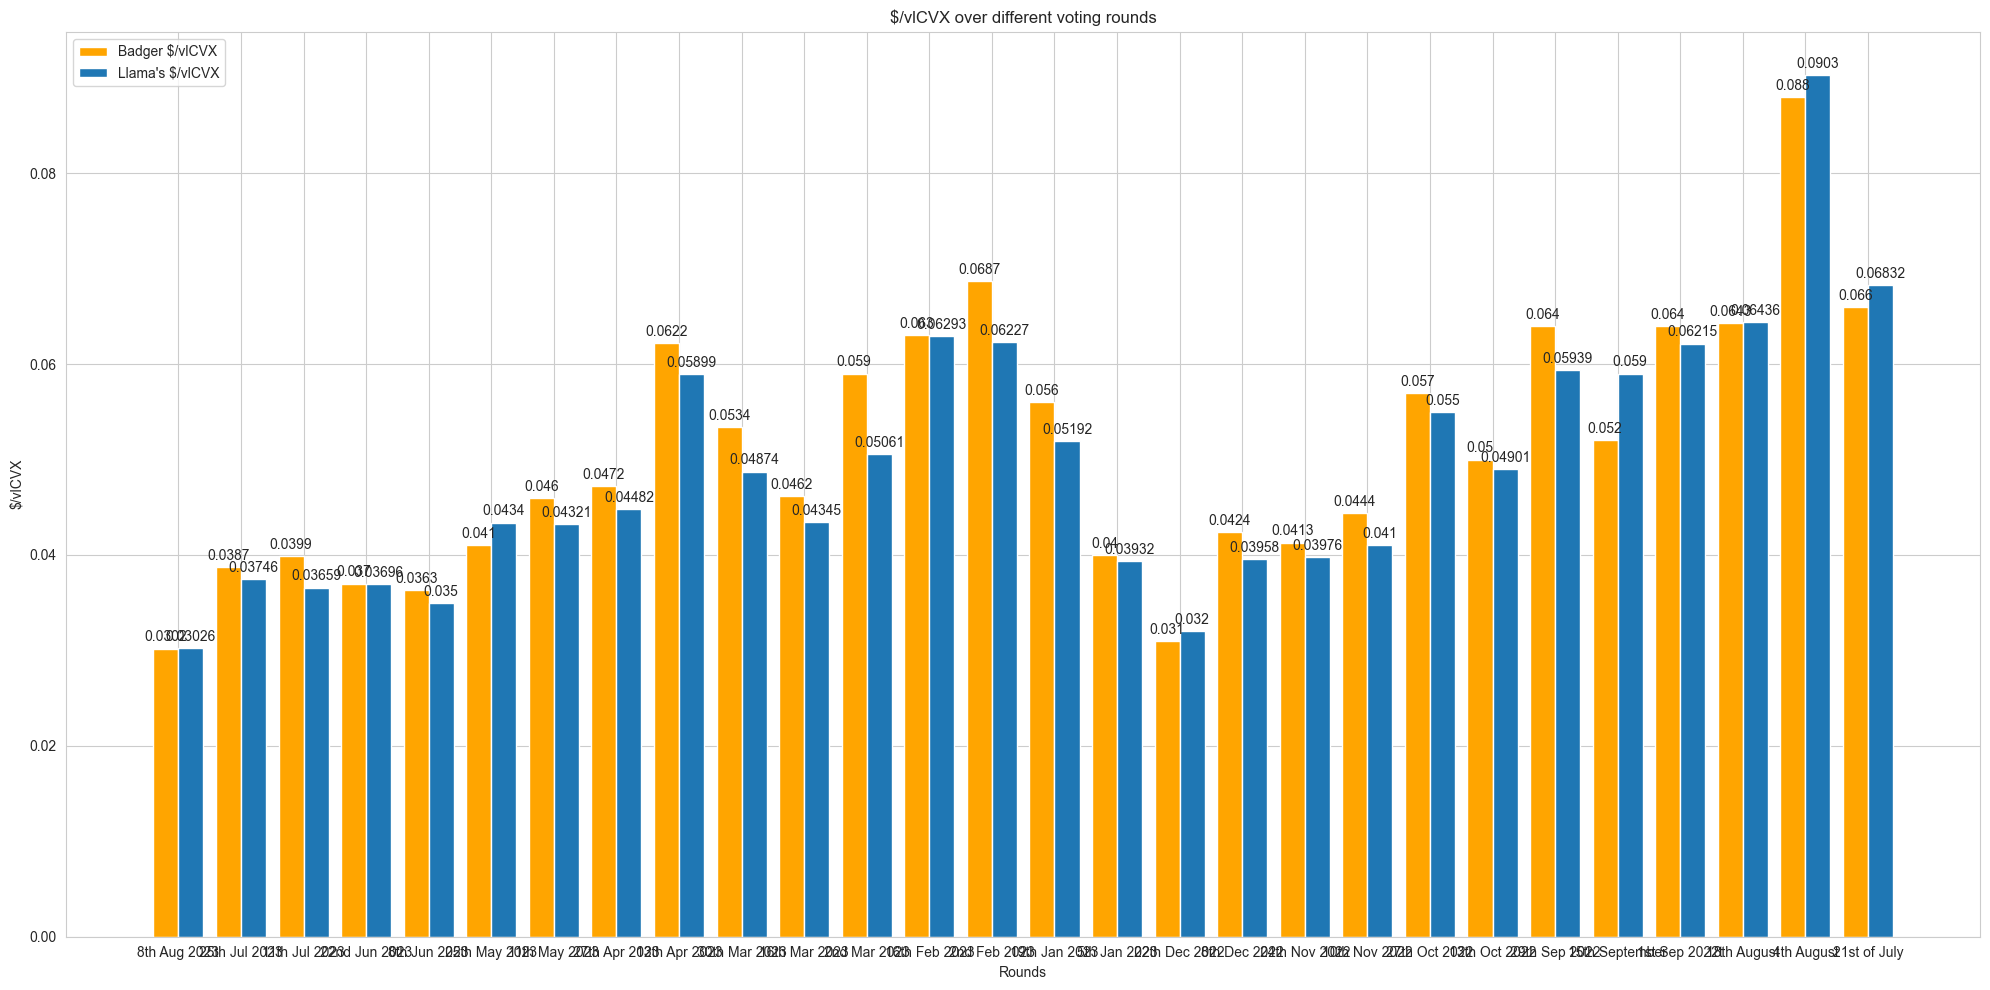

In [2]:
rounds = [dataset[0] for dataset in data_rows]
bvecvxs = [float(dataset[6]) for dataset in data_rows]
x = np.arange(len(rounds))
width = 0.4  # the width of the bars
fig, ax = plt.subplots()
# creating the bar plot
bar = ax.bar(x - width / 2, bvecvxs, width, label="Badger $/vlCVX", color='orange')
bar2 = ax.bar(x + width / 2, dataframe["$/vlcvx Llama"].tolist(), width, label="Llama's $/vlCVX")

ax.bar_label(bar, padding=3)
ax.bar_label(bar2, padding=3)

ax.set_xlabel("Rounds")
ax.set_ylabel("$/vlCVX")
ax.set_title("$/vlCVX over different voting rounds")
ax.set_xticks(x, rounds)
ax.legend()
fig.tight_layout()
plt.show()

## Overall bribes harvested in $


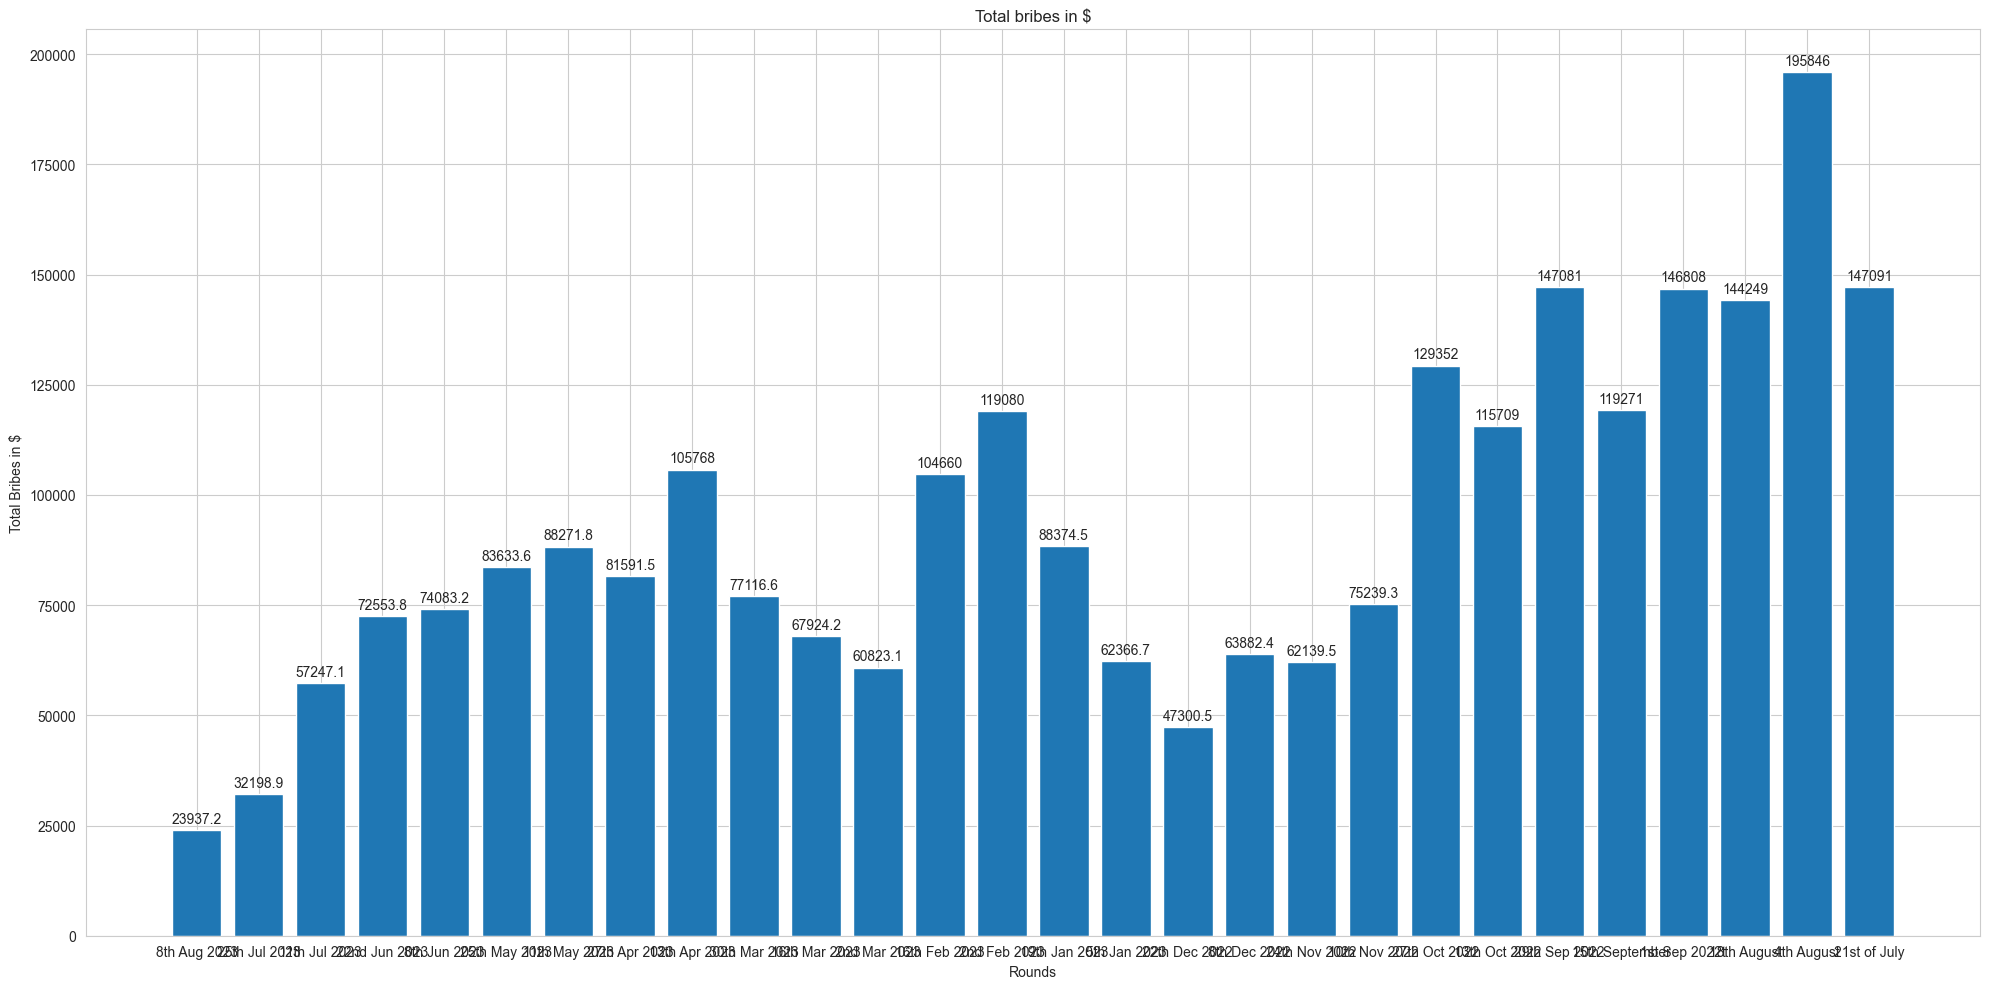

In [3]:
import matplotlib.pyplot as plt

rounds = [dataset[0] for dataset in data_rows]
total_bribes = [float(dataset[1] + dataset[2]) for dataset in data_rows]

x = np.arange(len(rounds))

fig, ax = plt.subplots()
# creating the bar plot
bar = ax.bar(x, total_bribes)
ax.set_xlabel("Rounds")
ax.set_ylabel("Total Bribes in $")
ax.set_title("Total bribes in $")
ax.set_xticks(x, rounds)
ax.bar_label(bar, padding=3)
fig.tight_layout()

plt.show()